<a href="https://colab.research.google.com/github/daveveed/Geo-Data-Science/blob/main/Nigeria_population_density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, geopandas as gpd, os, matplotlib.pyplot as plt

In [2]:
import requests

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
  os.mkdir(data_folder)

if not os.path.exists(output_folder):
  os.mkdir(output_folder)

In [4]:
def download (url):

  filename = os.path.join(data_folder, os.path.basename(url))
  if not os.path.exists(filename):
    response = requests.get(url, allow_redirects=True)

    with open(filename, 'wb') as f:
      f.write(response.content)
      print ('downloaded', filename)

In [25]:
shapefile_name = 'NGA_population_v1_2_admin_level2'
shapefile_exts = ['.shp', '.shx', '.dbf', '.prj']

# Corrected data_url to point to raw GitHub content
data_url = 'https://raw.githubusercontent.com/daveveed/Geo-Data-Science/main/Data/'

for ext in shapefile_exts:
  url = data_url + shapefile_name + ext

  download(url)

In [8]:
csv_url = 'https://github.com/daveveed/Geo-Data-Science/tree/main/Data/Nigerian%20POP/'
csv_name = 'states_pop_total_scaled.csv'

In [9]:
download(csv_url+csv_name)

downloaded data/states_pop_total_scaled.csv


In [42]:
csv_url = 'https://raw.githubusercontent.com/daveveed/Geo-Data-Science/main/Data/Nigerian%20POP/states_pop_total_scaled.csv'
# Re-download the file with the correct raw GitHub URL
download(csv_url)

csv_path = os.path.join(data_folder, csv_name)
pop = pd.read_csv(csv_path)
pop

,statename,population
0,Abia,3.924169e+06
1,Adamawa,6.006481e+06
2,Akwa Ibom,4.281014e+06
3,Anambra,5.788665e+06
4,Bauchi,8.781377e+06
5,Benue,9.067209e+06
6,Borno,6.269578e+06
7,Bayelsa,2.523454e+06
8,Cross-River,2.566393e+06
9,Delta,7.712872e+06


In [43]:
nigeria_path = os.path.join(data_folder, shapefile_name + '.shp')
nigeria_gdf = gpd.read_file(nigeria_path,driver="ESRI Shapefile")
nigeria_gdf

/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:200: RuntimeWarning: driver ESRI Shapefile does not support open option DRIVER
  return ogr_read(


,statecode,statename,capcity,source,timestamp,globalid,geozone,id,region,mean,q025,q05,q25,q50,q75,q95,q975,geometry
0,PL,Plateau,Jos,EHA-MICHAEL,2016/04/20 22:36:12.000,17379e56-2427-44bc-9778-9836eac9fcc4,NCZ,180.0,2,3.639275e+06,2.238255e+06,2410571.95,2962400.75,3444654.0,4085813.75,5513280.00,6.174099e+06,"POLYGON ((8.85167 10.36438, 8.87019 10.35763, ..."
1,AK,Akwa Ibom,Uyo,EHA-SAMUEL,2016/01/07 16:07:48.000,83fe39c7-8a62-4bb9-8cf7-8f2b58b5c276,SSZ,181.0,1,3.485613e+06,3.033512e+06,3104335.00,3310984.50,3467975.0,3642350.25,3925477.45,4.024870e+06,"POLYGON ((7.71063 5.51935, 7.71123 5.51647, 7...."
2,TA,Taraba,Jalingo,Oluseye.Abraham,2017/03/30 17:37:10.000,f34158b3-9a70-40f3-9d64-e97853a3b1fb,NEZ,192.0,2,4.228507e+06,1.984272e+06,2229877.15,3151859.25,3863693.0,4874087.00,7290583.90,8.512098e+06,"POLYGON ((11.0274 9.54907, 11.03553 9.54868, 1..."
3,KD,Kaduna,Kaduna,EHA-OLUSEYE,2016/06/07 11:55:19.000,aa13d807-45e2-4ba8-96ce-371126023935,NWZ,194.0,9,8.620189e+06,7.410069e+06,7586107.75,8124711.50,8567864.5,9038946.00,9877224.75,1.019756e+07,"POLYGON ((8.10216 11.52328, 8.10299 11.52266, ..."
4,OG,Ogun,Abeokuta,EHA-OLUSEYE,2016/05/11 16:04:25.000,7f0787e4-4518-4486-8bc5-51c5232df9d1,SWZ,218.0,11,9.506520e+06,6.495977e+06,6885790.25,8173521.50,9177296.5,10474327.00,13068066.30,1.427182e+07,"POLYGON ((2.84613 7.92988, 2.85077 7.92932, 2...."
5,BY,Bayelsa,Yenagoa,EHA-MICHAEL,2016/04/19 23:08:14.000,c92e2ed6-a32c-4b10-b084-1243d6a40178,SSZ,159.0,5,1.099952e+06,9.136002e+05,937998.00,1021962.00,1089310.5,1165762.25,1300838.40,1.356331e+06,"POLYGON ((6.55283 5.37988, 6.56198 5.37925, 6...."
6,AD,Adamawa,Yola,Oluseye.Abraham,2017/03/31 16:27:55.000,7d2a1c11-b5cb-45f3-b61e-7645aade9903,NEZ,226.0,2,3.606704e+06,3.170180e+06,3228695.55,3434705.25,3587957.0,3756567.75,4034199.60,4.146925e+06,"POLYGON ((13.58547 10.94946, 13.61324 10.9494,..."
7,CR,Cross River,Calabar,EHA_ABRAHAM,2017/01/27 16:29:39.000,c46ae452-d6b6-4618-b3f7-ed6015e978d7,SSZ,229.0,6,2.969531e+06,1.351367e+06,1517248.40,2156957.75,2744470.5,3468071.50,5142648.90,6.030866e+06,"POLYGON ((8.84841 6.86557, 8.85181 6.86325, 8...."
8,OS,Osun,Oshogbo,EHA-OLUSEYE,2016/05/10 14:01:58.000,05fc3e53-ce0a-491d-9b37-2e9f1e3651fb,SWZ,255.0,7,4.747219e+06,3.409216e+06,3595665.65,4195569.00,4644189.5,5174427.50,6208891.05,6.711189e+06,"POLYGON ((4.94975 8.05548, 4.96081 8.05243, 4...."
9,EK,Ekiti,Ado,EHA-OLUSEYE,2016/05/10 14:01:24.000,41307165-bb56-431a-9cab-026e3bee2480,SWZ,160.0,7,2.073712e+06,1.274603e+06,1399050.00,1773325.50,2002807.0,2269960.50,2979712.35,3.362753e+06,"POLYGON ((5.50593 8.01869, 5.50872 8.01764, 5...."


In [44]:
# Standardize 'statename' in the pop DataFrame to match nigeria_gdf
pop.loc[pop['statename'] == 'Federal Capital', 'statename'] = 'Fct, Abuja'
pop.loc[pop['statename'] == 'plateau', 'statename'] = 'Plateau'

# Display the updated pop DataFrame to confirm changes
display(pop.loc[pop['statename'].isin(['Fct, Abuja', 'Plateau'])])


# After executing this cell, please re-run the following cells in order:
# 1. The cell that creates `filtered_gdf` (if you modified `nigeria_gdf` directly, this might be `mZP7Q0BLUXMQ`)
# 2. The cell that merges `filtered_gdf` and `pop` (F-XMBFe6YCfc)
# 3. The cell that calculates density (cjDultAiYW8D)
# 4. The cell that plots the map (Po2OBLWjatOB)


,statename,population
14,"Fct, Abuja",3735905.649
31,Plateau,5771080.854


In [45]:
filtered_gdf = nigeria_gdf[['statecode', 'statename', 'capcity', 'geozone', 'region', 'geometry']]
filtered_gdf.head()

,statecode,statename,capcity,geozone,region,geometry
0,PL,Plateau,Jos,NCZ,2,"POLYGON ((8.85167 10.36438, 8.87019 10.35763, ..."
1,AK,Akwa Ibom,Uyo,SSZ,1,"POLYGON ((7.71063 5.51935, 7.71123 5.51647, 7...."
2,TA,Taraba,Jalingo,NEZ,2,"POLYGON ((11.0274 9.54907, 11.03553 9.54868, 1..."
3,KD,Kaduna,Kaduna,NWZ,9,"POLYGON ((8.10216 11.52328, 8.10299 11.52266, ..."
4,OG,Ogun,Abeokuta,SWZ,11,"POLYGON ((2.84613 7.92988, 2.85077 7.92932, 2...."


In [46]:
gdf = filtered_gdf.merge(pop, on='statename')

# Reproject to an equal-area CRS (Africa Albers Equal Area Conic) for accurate area calculation.
# This CRS uses meters as its unit.
gdf_projected = gdf.to_crs(crs='ESRI:102022')

# Calculate the area in square kilometers from the projected geometries.
# The .area attribute will return square meters, so we divide by 1,000,000 to get square kilometers.
gdf['area_sq_km'] = gdf_projected.geometry.area / 1e6

# Display the updated GeoDataFrame
gdf.head()

,statecode,statename,capcity,geozone,region,geometry,population,area_sq_km
0,PL,Plateau,Jos,NCZ,2,"POLYGON ((8.85167 10.36438, 8.87019 10.35763, ...",5.771081e+06,26024.358526
1,AK,Akwa Ibom,Uyo,SSZ,1,"POLYGON ((7.71063 5.51935, 7.71123 5.51647, 7....",4.281014e+06,6844.561628
2,TA,Taraba,Jalingo,NEZ,2,"POLYGON ((11.0274 9.54907, 11.03553 9.54868, 1...",4.473844e+06,58775.538977
3,KD,Kaduna,Kaduna,NWZ,9,"POLYGON ((8.10216 11.52328, 8.10299 11.52266, ...",1.123319e+07,45069.855715
4,OG,Ogun,Abeokuta,SWZ,11,"POLYGON ((2.84613 7.92988, 2.85077 7.92932, 2....",1.293434e+07,16792.911889


In [47]:
gdf['density'] = gdf['population']/gdf['area_sq_km']
gdf.head()

,statecode,statename,capcity,geozone,region,geometry,population,area_sq_km,density
0,PL,Plateau,Jos,NCZ,2,"POLYGON ((8.85167 10.36438, 8.87019 10.35763, ...",5.771081e+06,26024.358526,221.756892
1,AK,Akwa Ibom,Uyo,SSZ,1,"POLYGON ((7.71063 5.51935, 7.71123 5.51647, 7....",4.281014e+06,6844.561628,625.462109
2,TA,Taraba,Jalingo,NEZ,2,"POLYGON ((11.0274 9.54907, 11.03553 9.54868, 1...",4.473844e+06,58775.538977,76.117454
3,KD,Kaduna,Kaduna,NWZ,9,"POLYGON ((8.10216 11.52328, 8.10299 11.52266, ...",1.123319e+07,45069.855715,249.239500
4,OG,Ogun,Abeokuta,SWZ,11,"POLYGON ((2.84613 7.92988, 2.85077 7.92932, 2....",1.293434e+07,16792.911889,770.226339


## plotting

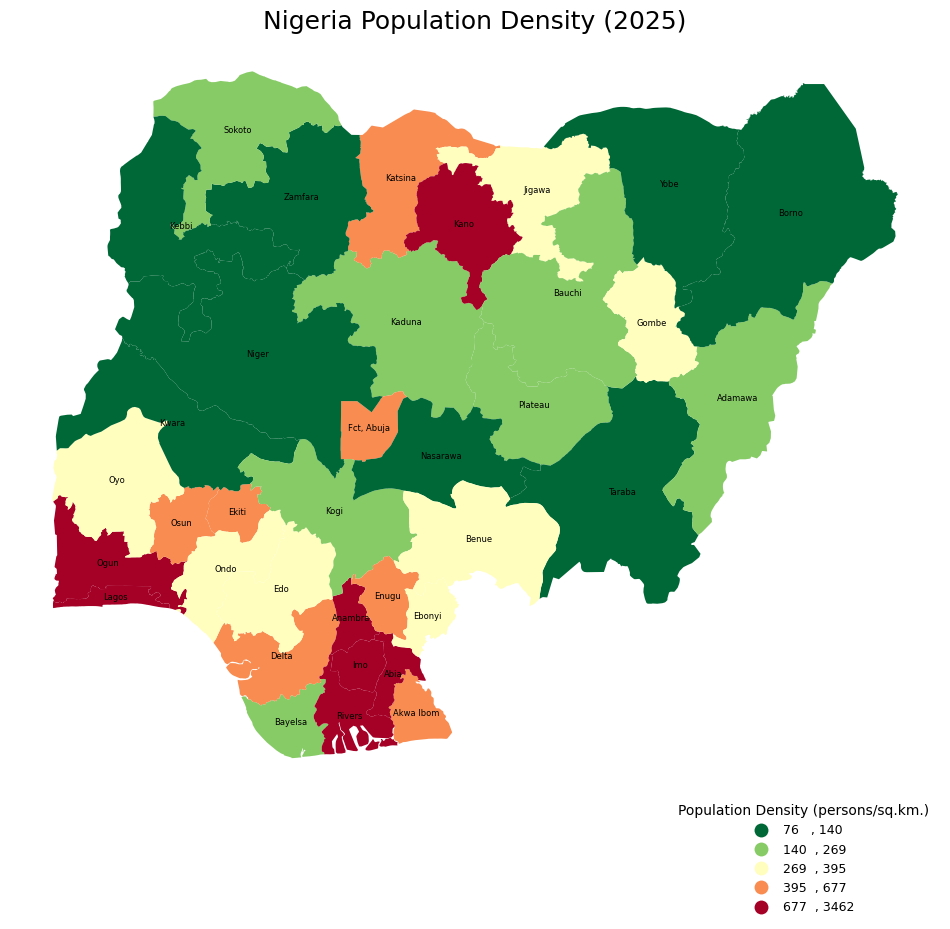

In [53]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12) # Increased figure size for better label visibility

legend_kwds= {
  # 'loc': 'upper left',
  'bbox_to_anchor': (1, 0), # Place legend outside the plot area on the right
  'fmt': '{:<5.0f}',
  'frameon': False,
  'fontsize': 9,
  'title': 'Population Density (persons/sq.km.)' # More explicit legend title
}

gdf.plot(ax=ax, column='density', cmap='RdYlGn_r',
         scheme='quantiles', legend=True, legend_kwds=legend_kwds)

# Add state names to the map
for idx, row in gdf.iterrows():
    # Get the centroid of the polygon
    centroid = row.geometry.centroid
    ax.annotate(
        text=row['statename'],
        xy=(centroid.x, centroid.y),
        xytext=(0, 0), # No offset
        textcoords="offset points",
        color='black', # Text color
        fontsize=6,    # Font size for state names
        ha='center',   # Horizontal alignment
        va='center'    # Vertical alignment
    )

ax.set_axis_off()
ax.set_title('Nigeria Population Density (2025)', size = 18)

output_path = os.path.join(output_folder, 'Nigerian_Pop.png')
plt.savefig(output_path, dpi=150, bbox_inches='tight') # Use bbox_inches='tight' to include legend and labels

plt.show()